In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, time, datetime
%matplotlib inline

In [2]:
train_labels = pd.read_csv('train_labels.csv')
train_labels

,building_id,damage_grade
0,802906,3.0
1,28830,2.0
2,94947,3.0
3,590882,2.0
4,201944,3.0
...,...,...
117221,677147,2.0
117222,720409,3.0
117223,185979,2.0
117224,559220,2.0


In [3]:
train_values = pd.read_csv('train_values.csv', usecols=['building_id', 'age', 'plan_configuration'])
train_values.shape

(11646, 3)

In [4]:
merged = train_values.merge(train_labels, how='inner')
merged

,building_id,age,plan_configuration,damage_grade
0,802906,30,d,3.0
1,28830,10,d,2.0
2,94947,10,d,3.0
3,590882,10,d,2.0
4,201944,30,d,3.0
...,...,...,...,...
11641,134590,20,d,2.0
11642,436328,15,d,3.0
11643,625777,10,d,3.0
11644,676501,10,d,2.0


In [6]:
merged_avg = merged.groupby(['plan_configuration', 'damage_grade']).agg({'age':'mean'})
merged_avg.columns = ['age_avg']
merged_avg.reset_index()

,plan_configuration,damage_grade,age_avg
0,a,1.0,8.750000
1,a,2.0,45.833333
2,a,3.0,30.000000
3,c,1.0,11.666667
4,c,2.0,15.000000
5,d,1.0,20.324612
6,d,2.0,25.622559
7,d,3.0,26.780423
8,f,2.0,55.000000
9,m,1.0,25.000000


In [22]:
pivot_table = merged_avg.pivot_table(index='plan_configuration', columns='damage_grade', values='age_avg', fill_value=0)
pivot_table.columns = [1, 2,	3]
pivot_table

,1,2,3
plan_configuration,,,
a,8.750000,45.833333,30.000000
c,11.666667,15.000000,0.000000
d,20.324612,25.622559,26.780423
f,0.000000,55.000000,0.000000
m,25.000000,67.500000,25.000000
n,5.000000,15.000000,0.000000
o,7.500000,24.000000,45.000000
q,10.000000,19.200000,22.083333
s,5.000000,14.444444,26.666667


Text(0, 0.5, 'Edad')

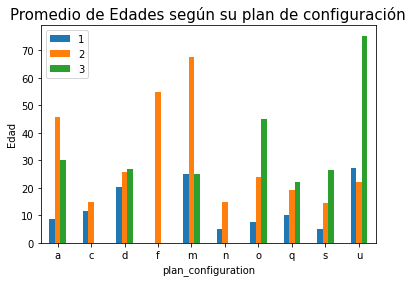

In [23]:
pivot_table[[1, 2, 3]].plot(kind="bar", rot=0)
plt.title("Promedio de Edades según su plan de configuración", fontsize=15)
plt.ylabel("Edad")